## Analysis of Sales across different platform for Olist 📈

## Loading Datasets and libraries in the Jupyter Notebook 📔

In [1]:
%load_ext autoreload
%autoreload 2

# Importing Data and Libraries

import numpy as np
import pandas as pd
import matplotlib as plt
from data import Olist

In [3]:
# Loading the required dataset

df_dict = Olist().get_data()
orders = df_dict['orders']
orders = orders.copy()
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Cleaning of the orders dataset
# Converting date columns to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Filtering only completed orders
orders_clean = orders[orders['order_status'] == 'delivered'].copy()

print(f"Total Orders: {len(orders_clean):,}")
print(f"Date Range: {orders_clean['order_purchase_timestamp'].min()} to {orders_clean['order_purchase_timestamp'].max()}")
orders_clean.head()

Total Orders: 96,478
Date Range: 2016-09-15 12:16:38 to 2018-08-29 15:00:37


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Loading additional datasets for analysis
order_items = df_dict['order_items']
products = df_dict['products']
customers = df_dict['customers']
sellers = df_dict['sellers']
product_category = df_dict['product_category_name_translation']

# Merging datasets for comprehensive analysis
sales_data = orders_clean.merge(order_items, on='order_id', how='left')
sales_data = sales_data.merge(products, on='product_id', how='left')
sales_data = sales_data.merge(customers, on='customer_id', how='left')
sales_data = sales_data.merge(sellers, on='seller_id', how='left', suffixes=('_customer', '_seller'))

# Adding product category names in English
sales_data = sales_data.merge(product_category, on='product_category_name', how='left')

print(f"Total Sales Records: {len(sales_data):,}")
sales_data.head()

Total Sales Records: 110,197


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,stationery


### 1️⃣ Evolution Over Time - Monthly Sales Trend 

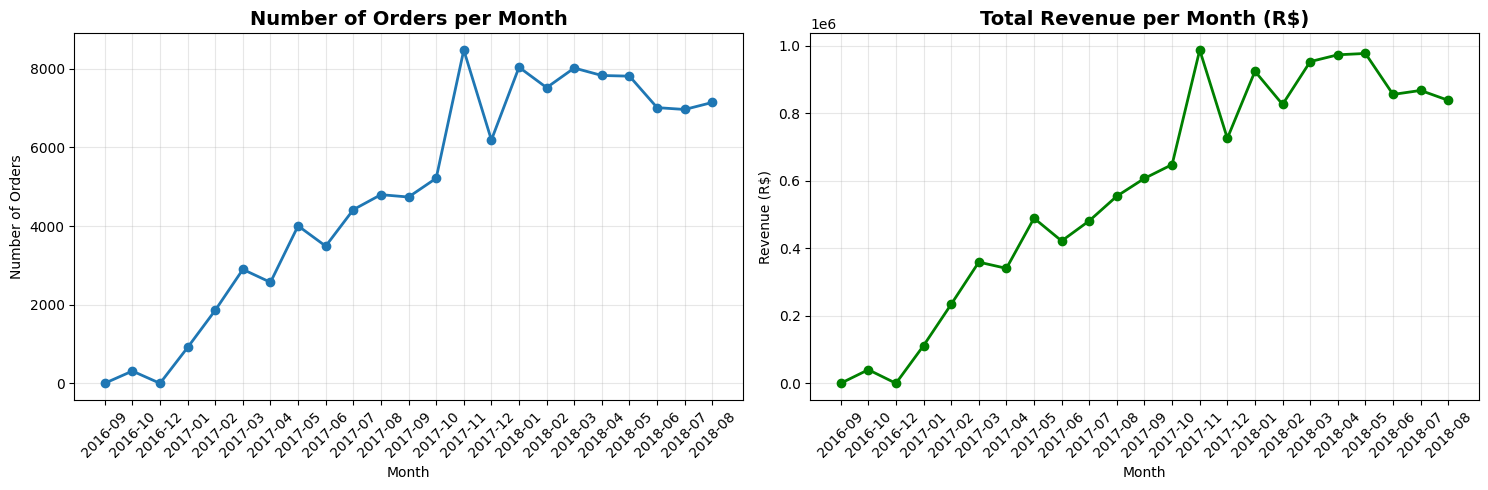


📊 Key Insights:
• Best Month (Orders): 2017-11
• Best Month (Revenue): 2017-11


In [6]:
# Group by month and calculate key metrics
sales_data['order_month'] = sales_data['order_purchase_timestamp'].dt.to_period('M')

monthly_sales = sales_data.groupby('order_month').agg({
    'order_id': 'count',  # Number of orders
    'price': 'sum'        # Total revenue
}).reset_index()

monthly_sales.columns = ['Month', 'Number_of_Orders', 'Total_Revenue']
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Visualize
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Orders over time
ax1.plot(monthly_sales['Month'], monthly_sales['Number_of_Orders'], marker='o', linewidth=2)
ax1.set_title('Number of Orders per Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Revenue over time
ax2.plot(monthly_sales['Month'], monthly_sales['Total_Revenue'], marker='o', linewidth=2, color='green')
ax2.set_title('Total Revenue per Month (R$)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue (R$)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"• Best Month (Orders): {monthly_sales.loc[monthly_sales['Number_of_Orders'].idxmax(), 'Month']}")
print(f"• Best Month (Revenue): {monthly_sales.loc[monthly_sales['Total_Revenue'].idxmax(), 'Month']}")

### 2️⃣ Product Categories - Top Sellers

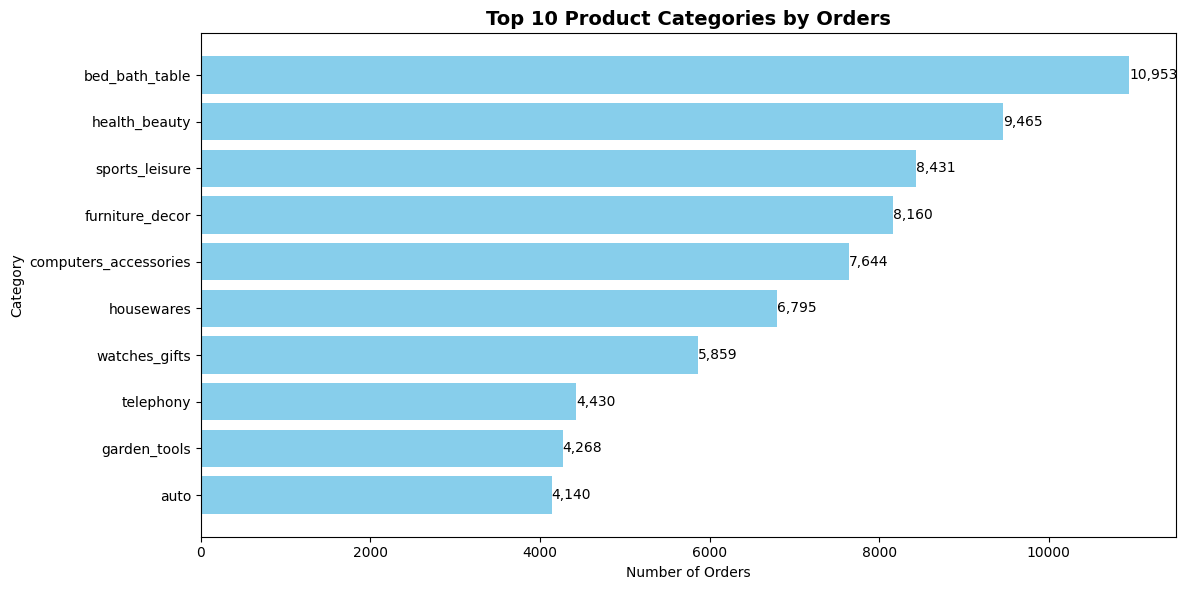


📦 Top 3 Categories:
bed_bath_table: 10,953 orders, R$ 1,023,434.76
health_beauty: 9,465 orders, R$ 1,233,131.72
sports_leisure: 8,431 orders, R$ 954,852.55


In [7]:
# Top 10 product categories by number of orders
category_sales = sales_data.groupby('product_category_name_english').agg({
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

category_sales.columns = ['Category', 'Number_of_Orders', 'Total_Revenue']
category_sales = category_sales.sort_values('Number_of_Orders', ascending=False).head(10)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(category_sales['Category'], category_sales['Number_of_Orders'], color='skyblue')
ax.set_title('Top 10 Product Categories by Orders', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Category')
ax.invert_yaxis()

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📦 Top 3 Categories:")
for idx, row in category_sales.head(3).iterrows():
    print(f"{row['Category']}: {int(row['Number_of_Orders']):,} orders, R$ {row['Total_Revenue']:,.2f}")

### 3️⃣ Seller Performance - Top Sellers

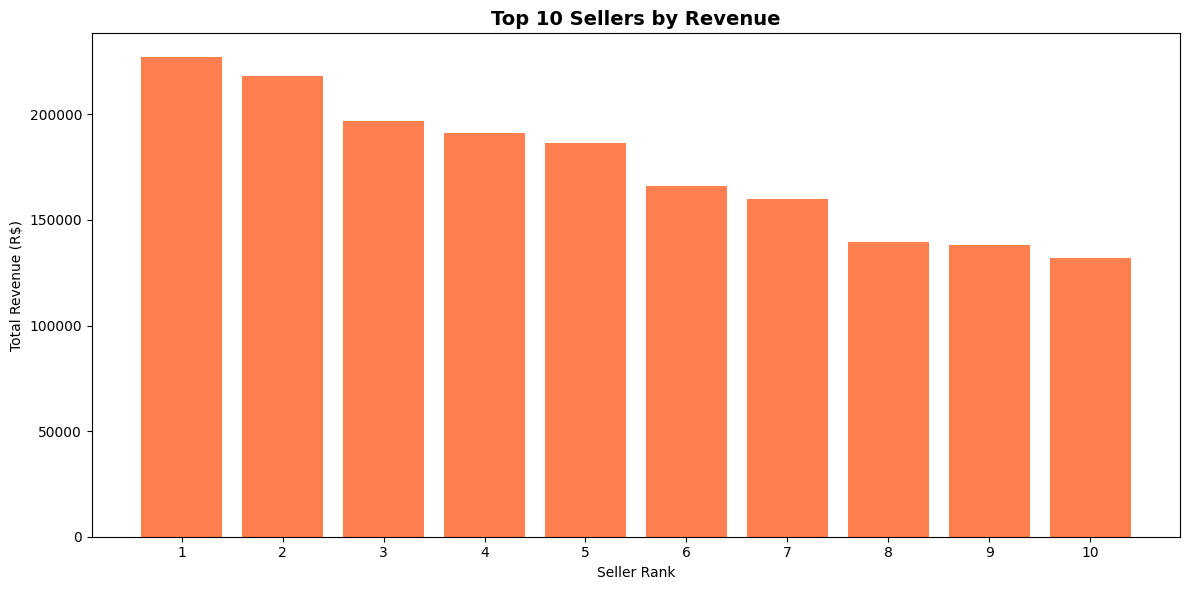


🏆 Seller Insights:
• Total Active Sellers: 2,970
• Top Seller Revenue: R$ 226,987.93
• Average Revenue per Seller: R$ 4,451.68


In [8]:
# Top 10 sellers by revenue
seller_performance = sales_data.groupby('seller_id').agg({
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

seller_performance.columns = ['Seller_ID', 'Number_of_Orders', 'Total_Revenue']
seller_performance = seller_performance.sort_values('Total_Revenue', ascending=False).head(10)
seller_performance['Seller_Rank'] = range(1, len(seller_performance) + 1)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(seller_performance['Seller_Rank'].astype(str), seller_performance['Total_Revenue'], color='coral')
ax.set_title('Top 10 Sellers by Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Seller Rank')
ax.set_ylabel('Total Revenue (R$)')

plt.tight_layout()
plt.show()

print("\n🏆 Seller Insights:")
print(f"• Total Active Sellers: {sales_data['seller_id'].nunique():,}")
print(f"• Top Seller Revenue: R$ {seller_performance['Total_Revenue'].iloc[0]:,.2f}")
print(f"• Average Revenue per Seller: R$ {sales_data.groupby('seller_id')['price'].sum().mean():,.2f}")

### 4️⃣ Customer Analysis - Geographic Distribution

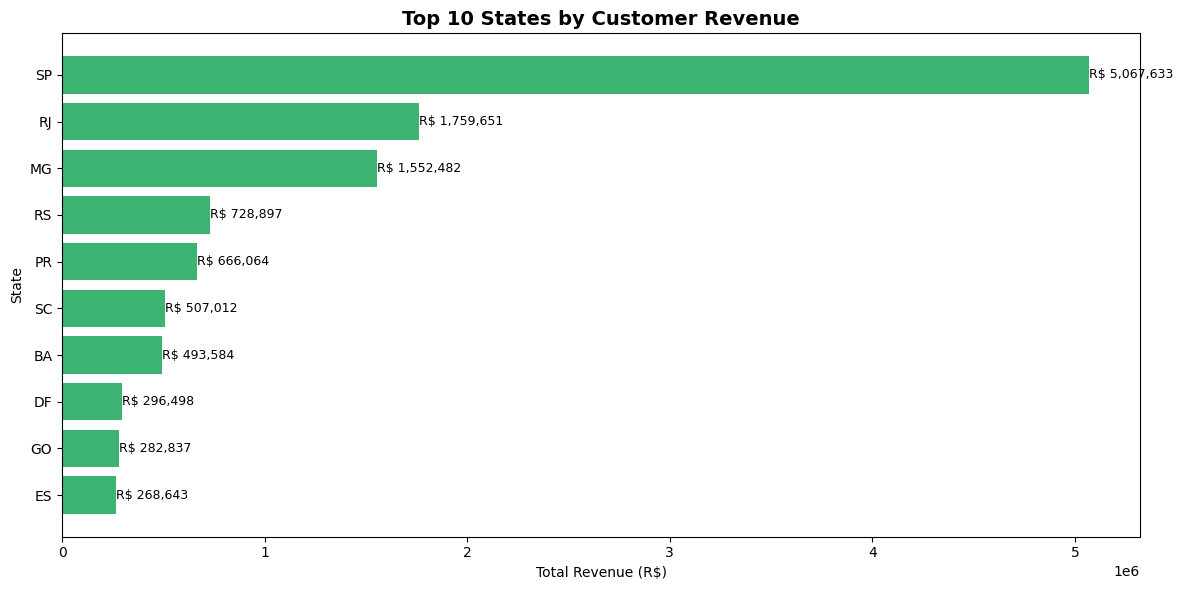


🗺️ Geographic Insights:
• Total States with Customers: 27
• Top State: SP with R$ 5,067,633.16


In [9]:
# Customer distribution by state
customer_geo = sales_data.groupby('customer_state').agg({
    'customer_id': 'nunique',  # Unique customers
    'order_id': 'count',       # Total orders
    'price': 'sum'             # Total revenue
}).reset_index()

customer_geo.columns = ['State', 'Unique_Customers', 'Total_Orders', 'Total_Revenue']
customer_geo = customer_geo.sort_values('Total_Revenue', ascending=False).head(10)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(customer_geo['State'], customer_geo['Total_Revenue'], color='mediumseagreen')
ax.set_title('Top 10 States by Customer Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Revenue (R$)')
ax.set_ylabel('State')
ax.invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'R$ {width:,.0f}',
            ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n🗺️ Geographic Insights:")
print(f"• Total States with Customers: {sales_data['customer_state'].nunique()}")
print(f"• Top State: {customer_geo.iloc[0]['State']} with R$ {customer_geo.iloc[0]['Total_Revenue']:,.2f}")

### 5️⃣ Geographic Analysis - Seller Distribution

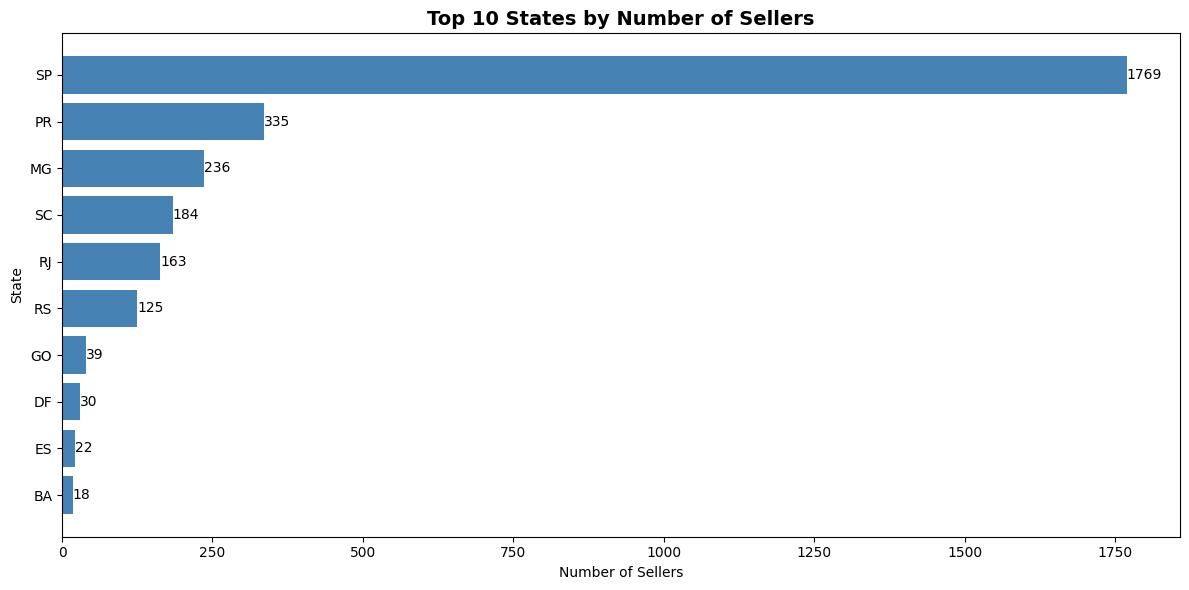


🏪 Seller Distribution:
• Total States with Sellers: 22
• State with Most Sellers: SP (1769 sellers)


In [10]:
# Seller distribution by state
seller_geo = sales_data.groupby('seller_state').agg({
    'seller_id': 'nunique',
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

seller_geo.columns = ['State', 'Number_of_Sellers', 'Total_Orders', 'Total_Revenue']
seller_geo = seller_geo.sort_values('Number_of_Sellers', ascending=False).head(10)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(seller_geo['State'], seller_geo['Number_of_Sellers'], color='steelblue')
ax.set_title('Top 10 States by Number of Sellers', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Sellers')
ax.set_ylabel('State')
ax.invert_yaxis()

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🏪 Seller Distribution:")
print(f"• Total States with Sellers: {sales_data['seller_state'].nunique()}")
print(f"• State with Most Sellers: {seller_geo.iloc[0]['State']} ({int(seller_geo.iloc[0]['Number_of_Sellers'])} sellers)")

### 📈 Summary Dashboard - Key Metrics

In [11]:
# Calculate overall KPIs
total_orders = len(sales_data)
total_revenue = sales_data['price'].sum()
avg_order_value = sales_data['price'].mean()
total_customers = sales_data['customer_id'].nunique()
total_sellers = sales_data['seller_id'].nunique()

print("="*60)
print("📊 OLIST SALES OVERVIEW")
print("="*60)
print(f"\n💰 REVENUE METRICS:")
print(f"   • Total Revenue: R$ {total_revenue:,.2f}")
print(f"   • Average Order Value: R$ {avg_order_value:,.2f}")
print(f"\n📦 ORDER METRICS:")
print(f"   • Total Orders: {total_orders:,}")
print(f"\n👥 STAKEHOLDER METRICS:")
print(f"   • Total Customers: {total_customers:,}")
print(f"   • Total Sellers: {total_sellers:,}")
print(f"   • Orders per Customer: {total_orders/total_customers:.2f}")
print("\n" + "="*60)

📊 OLIST SALES OVERVIEW

💰 REVENUE METRICS:
   • Total Revenue: R$ 13,221,498.11
   • Average Order Value: R$ 119.98

📦 ORDER METRICS:
   • Total Orders: 110,197

👥 STAKEHOLDER METRICS:
   • Total Customers: 96,478
   • Total Sellers: 2,970
   • Orders per Customer: 1.14

